In [1]:
import numpy as np
import pImpactR as impact
from copy import deepcopy as copy
import matplotlib.pyplot as plt
import sys
np.set_printoptions(formatter={'float': lambda x: format(x, '1.2E')})

In [2]:
def getH(x,y):
    z = x+1j*y
    U = z/np.sqrt(1-z*z)*np.arcsin(z)
    U = U.real
    return 0.5*(x*x+y*y) + 0.4*U

In [3]:
def getI(x,y):
    z = x+1j*y
    W = 2*x/np.sqrt(1-z*z)*np.arcsin(z)
    W = W.real
    return x*x + 0.4*W

In [4]:
def I2Hobj(y,args):
    measI = getI(args[0],y)
    measH = getH(args[0],y)
    return (measI-2*measH)**2

In [5]:
from scipy.optimize import minimize
arc = []
ref = []
   
for x in np.linspace(0.32,1,512):
    y = (x-0.25)**0.5
    result = minimize(I2Hobj,y,args=([x]),tol=1.0e-10)
    if result.fun < 1.0e-14 and result.x[0] > 0:
        arc.append([x,result.x[0]])
    ref.append([x,y])
arc.insert(0,[0.33,0])

arc = np.array(arc)
ref = np.array(ref)

(-1, 1)

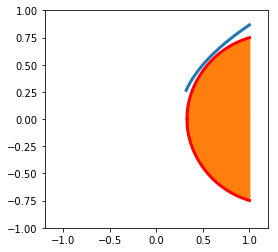

In [6]:
plt.figure(figsize=(4,4))
plt.plot(ref[:,0],ref[:,1],lw=3)
plt.plot(arc[:,0], arc[:,1],lw=3,c='red')
plt.plot(arc[:,0],-arc[:,1],lw=3,c='red')
plt.fill_between(arc[:,0], arc[:,1],color='C1')
plt.fill_between(arc[:,0],-arc[:,1],color='C1')
plt.xlim(-1.2,1.2)
plt.ylim(-1,1)

### curvOut

321

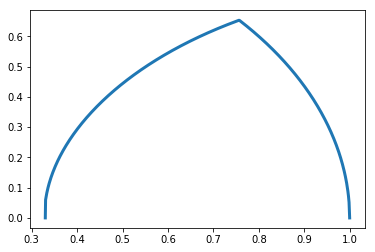

In [7]:
curvOut = copy(arc)
# plt.plot(arc[:,0],arc[:,1],lw=3)
nsample = len(arc)
for i in range(nsample):
    x,y=arc[i,:]
    tmpy = 1-x*x
    if tmpy <= 0.0:
        curvOut[i,1] = 0.0
        continue
    if y*y > tmpy:
        curvOut[i,1]=np.sqrt(tmpy)
        
plt.plot(curvOut[:,0],curvOut[:,1],lw=3)

iPeak = np.argmax(curvOut[:,1])
iPeak

### curvIn

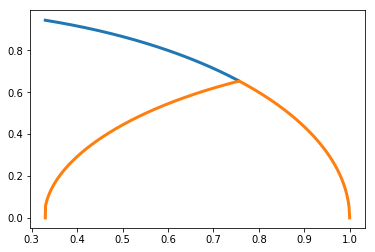

In [8]:
curvIn = []
# plt.plot(arc[:,0],arc[:,1],lw=3)
for i in range(iPeak):
    x,y=arc[i,:]
    tmpy = 1-x*x
    curvIn.append([x,np.sqrt(tmpy)])
    
curvIn = np.array(curvIn)

plt.plot(curvIn [:,0],curvIn [:,1],lw=3)
plt.plot(curvOut[:,0],curvOut[:,1],lw=3)

### circ

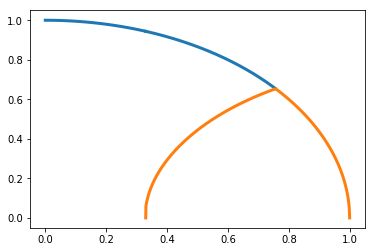

In [9]:
circ = []
# plt.plot(arc[:,0],arc[:,1],lw=3)
for x in np.linspace(0,curvIn[0,0],32):
    y = 1-x*x
    circ.append([x,np.sqrt(y)])
    
circ = np.array(circ)

plt.plot(circ   [:,0],circ   [:,1],lw=3,c='C0')
plt.plot(curvIn [:,0],curvIn [:,1],lw=3,c='C0')
plt.plot(curvOut[:,0],curvOut[:,1],lw=3,c='C1')

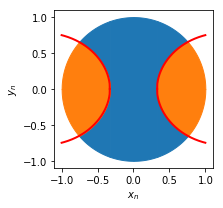

In [12]:
plt.figure(figsize=(3.2,3))
plt.fill_between(circ   [:,0],circ   [:,1],                  color='C0')
plt.fill_between(curvIn [:,0],curvIn [:,1],curvOut[:iPeak,1],color='C0')
plt.fill_between(curvOut[:,0],curvOut[:,1],                  color='C1')

plt.fill_between(circ   [:,0],-circ   [:,1],                   color='C0')
plt.fill_between(curvIn [:,0],-curvIn [:,1],-curvOut[:iPeak,1],color='C0')
plt.fill_between(curvOut[:,0],-curvOut[:,1],                   color='C1')

plt.fill_between(-circ   [:,0],circ   [:,1],                  color='C0')
plt.fill_between(-curvIn [:,0],curvIn [:,1],curvOut[:iPeak,1],color='C0')
plt.fill_between(-curvOut[:,0],curvOut[:,1],                  color='C1')

plt.fill_between(-circ   [:,0],-circ   [:,1],                   color='C0')
plt.fill_between(-curvIn [:,0],-curvIn [:,1],-curvOut[:iPeak,1],color='C0')
plt.fill_between(-curvOut[:,0],-curvOut[:,1],                   color='C1')

plt.plot( arc[:,0], arc[:,1],lw=2,c='red')
plt.plot( arc[:,0],-arc[:,1],lw=2,c='red')
plt.plot(-arc[:,0], arc[:,1],lw=2,c='red')
plt.plot(-arc[:,0],-arc[:,1],lw=2,c='red')

plt.xlabel(r'$x_n$')
plt.ylabel(r'$y_n$')

plt.xticks([-1,-0.5,0,0.5,1])
plt.yticks([-1,-0.5,0,0.5,1])

plt.tight_layout()
plt.savefig('geometricStructure.png',dpi=90)
plt.savefig('geometricStructure.eps',dpi=90)